In [1]:
from fenics import *
from dolfin_adjoint import *
import pygmsh_mesh_functions
from pygmsh_mesh_functions import *
import meshio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def hole_NPR(domain, c, l, theta, margin = 0.05):
    co, so = np.cos(theta), np.sin(theta)
    Rotation = np.array(((co, -so), (so, co)))
    shift_l = np.matmul(Rotation,np.array([-1,0]))
    shift_r = np.matmul(Rotation,np.array([ 1,0]))
    ell_c = add_ellipse(c, (1-margin)*np.sqrt(1/2)*l, (1-margin)*np.sqrt(1/2)*l)
    ell_l = add_ellipse(c+shift_l*l, (1+margin)*np.sqrt(1/2)*l, (1+margin)*np.sqrt(1/2)*l)
    ell_r = add_ellipse(c+shift_r*l, (1+margin)*np.sqrt(1/2)*l, (1+margin)*np.sqrt(1/2)*l)
    tool = subtract(ell_c, ell_l)
    tool = subtract(tool, ell_r)
    domain = subtract(domain, tool)

def hole_concave(domain, c, l, theta, margin = 0.05):
    co, so = np.cos(theta), np.sin(theta)
    Rotation = np.array(((co, -so), (so, co)))
    shift_l = np.matmul(Rotation,np.array([-1,0]))
    shift_r = np.matmul(Rotation,np.array([ 1,0]))
    ell_c = add_ellipse(c, (1)*np.sqrt(1/2)*l, (1)*np.sqrt(1/2)*l)
    ell_l = add_ellipse(c+shift_l*l, (1+margin)*np.sqrt(1/2)*l, (1+margin)*np.sqrt(1/2)*l)
    ell_r = add_ellipse(c+shift_r*l, (1+margin)*np.sqrt(1/2)*l, (1+margin)*np.sqrt(1/2)*l)
    tool = subtract(ell_c, ell_l)
    tool = subtract(tool, ell_r)
    domain = subtract(domain, tool)

def hole_convex(domain, c, l, theta, margin = 0.05):
    co, so = np.cos(theta), np.sin(theta)
    Rotation = np.array(((co, -so), (so, co)))
    shift_l = np.matmul(Rotation,np.array([-1,0]))
    shift_r = np.matmul(Rotation,np.array([ 1,0]))
    ell_c = add_ellipse(c, (1-margin)*np.sqrt(1/2)*l, (1-margin)*np.sqrt(1/2)*l)
    domain = subtract(domain, ell_c)

In [3]:
# arrange the tools
n_holes_x = 7
n_holes_y = 7
max_n_holes = np.max((n_holes_x,n_holes_x))
scale = 1-4*0.2/7
l = scale/max_n_holes

xx = scale*(np.arange(n_holes_x)-n_holes_x/2+0.5)/max_n_holes+0.5
yy = scale*(np.arange(n_holes_y)-n_holes_y/2+0.5)/max_n_holes+0.5
cx,cy = np.meshgrid(xx,yy)
cx = cx.reshape(n_holes_x*n_holes_y)
cy = cy.reshape(n_holes_x*n_holes_y)
c = np.vstack((cx,cy))

s_xx = (-1)**np.arange(n_holes_x)
s_yy = (-1)**np.arange(n_holes_y)
sgn_x,sgn_y = np.meshgrid(s_xx,s_yy)
sgn = sgn_x*sgn_y
sgn = sgn.reshape(n_holes_x*n_holes_y)
theta = np.pi*(1-sgn)/4

xx_l = scale*(-1-n_holes_x/2+0.5)/max_n_holes+0.5
xx_r = scale*(len(xx)-n_holes_x/2+0.5)/max_n_holes+0.5
cx_l,cy_l = np.meshgrid(xx_l,yy)
cx_r,cy_r = np.meshgrid(xx_r,yy)
c_l = np.vstack((cx_l.T,cy_l.T))
c_r = np.vstack((cx_r.T,cy_r.T))

s_xx_l = (-1)**(-1)
s_xx_r = (-1)**(len(xx))
sgn_l = s_xx_l*s_yy
sgn_r = s_xx_r*s_yy

Info    : Running '/home/fenics/.local/bin/gmsh -3 /tmp/tmplxe17t9z.geo -format msh -bin -o /tmp/tmpoke3jjp5.msh' [Gmsh 4.9.5, 1 node, max. 1 thread]
Info    : Started on Mon Apr 25 15:32:50 2022
Info    : Reading '/tmp/tmplxe17t9z.geo'...
Info    : Done reading '/tmp/tmplxe17t9z.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Ellipse)
Info    : [ 10%] Meshing curve 2 (Ellipse)
Info    : [ 10%] Meshing curve 3 (Ellipse)
Info    : [ 10%] Meshing curve 4 (Ellipse)
Info    : [ 10%] Meshing curve 5 (Ellipse)
Info    : [ 10%] Meshing curve 6 (Ellipse)
Info    : [ 10%] Meshing curve 7 (Ellipse)
Info    : [ 10%] Meshing curve 8 (Ellipse)
Info    : [ 10%] Meshing curve 9 (Ellipse)
Info    : [ 10%] Meshing curve 10 (Ellipse)
Info    : [ 10%] Meshing curve 11 (Ellipse)
Info    : [ 10%] Meshing curve 12 (Ellipse)
Info    : [ 10%] Meshing curve 13 (Ellipse)
Info    : [ 10%] Meshing curve 14 (Ellipse)
Info    : [ 10%] Meshing curve 15 (Ellipse)
Info    : [ 10%] Meshing curve 16 (Elli

4716

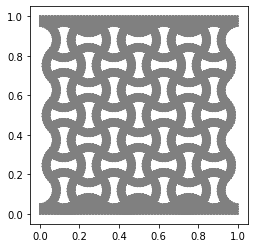

In [5]:
reset_geometry()

Lx = 1
Ly = 1

meshsize_min = 0.015
meshsize_max = 0.015

pygmsh_mesh_functions.hmeshmin = meshsize_min
pygmsh_mesh_functions.hmeshmax = meshsize_max

domain = add_polygon([(0, 0), (Lx, 0), (Lx, Ly), (0, Ly)])
X0 = np.array([0, 0])

#OPERATIONS ON DOMAIN
for i in range(len(theta)):
    hole_NPR(domain, c[:,i], l, theta[i], margin = 0.2)

for i in range(len(yy)):
    if sgn_l[i] == 1:
        hole_concave(domain, c_l[:,i], l, 0, margin = 0.2)
    else:
        hole_convex(domain, c_l[:,i], l, 0, margin = 0.2)
    if sgn_r[i] == 1:
        hole_concave(domain, c_r[:,i], l, 0, margin = 0.2)
    else:
        hole_convex(domain, c_r[:,i], l, 0, margin = 0.2)


#CREATE AND STORE MESH
sample_name = "test_NPR.xdmf"
out_dir = pathlib.Path("output_files")
out_dir.mkdir(parents=True, exist_ok=True)
mesh = create_fenics_mesh(mesh_path = out_dir / sample_name, verbose=True)
cell_type = mesh.cell_name()
with create_XDMFFile(out_dir / sample_name) as xf:
    xf.write(mesh)
    
plot(mesh)
len(mesh.coordinates())